In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
data=pd.read_csv('func/train100.txt',delimiter=' ',header=None)
txt = pd.DataFrame(data).to_numpy()

In [3]:
X_train = txt[:, :2]
Y_train = txt[:, 2]

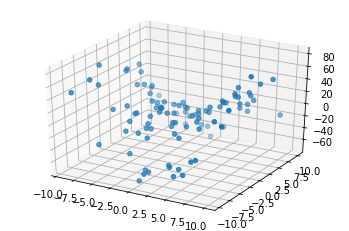

In [4]:
# plot of given data

ax = plt.axes(projection='3d')
ax.scatter3D(txt[:,0],txt[:,1],txt[:,2])
plt.show()

In [5]:
# Parameters

lam=1
learning_rate=0.01
learning_Rate=0.01
num_iterations=30000
delta_cost = 1e-6
beta = 0.9
gamma = 0.99


# Random initialization of weights

W1 = np.random.randn(30,2) *np.sqrt(2/2)
b1 = np.zeros(shape=(30, 1))
W2 = np.random.randn(10, 30) * np.sqrt(2/30)
b2 = np.zeros(shape=(10, 1))
W3 = np.random.randn(1, 10) *np.sqrt(2/10)
b3 = np.zeros(shape=(1, 1))
    
parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}

In [6]:
# Generalized Delta

opcode = 1

In [7]:


costs=[]
cost = 0
velocity = {"vW1": np.zeros_like(parameters['W1']),
         "vb1": np.zeros_like(parameters['b1']),
         "vW2": np.zeros_like(parameters['W2']),
         "vb2": np.zeros_like(parameters['b2']),
         "vW3": np.zeros_like(parameters['W3']),
         "vb3": np.zeros_like(parameters['b3'])
        }

rms_prop = {"vW1": np.zeros_like(parameters['W1']),
         "vb1": np.zeros_like(parameters['b1']),
         "vW2": np.zeros_like(parameters['W2']),
         "vb2": np.zeros_like(parameters['b2']),
         "vW3": np.zeros_like(parameters['W3']),
         "vb3": np.zeros_like(parameters['b3'])
        }


i = 0
# for i in range(0, num_iterations):
while(True):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
   
    Z1 = np.dot(W1, X_train.T) + b1
    A1 = np.tanh(Z1)
    D1 = np.random.rand(A1.shape[0], A1.shape[1])    
    Z2 = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2)
    D2 = np.random.rand(A2.shape[0], A2.shape[1])    
    Z3 = np.dot(W3, A2) + b3
    A3 = Z3
    
    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    prev_cost = cost
    
    cost = (np.sum((Y_train-A3)**2)/99)+(lam* (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3))) / (2 * 99))
    if i % 100 == 0:
            costs.append(cost)
    
   
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
        
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    
    dZ3 = A3 - Y_train
    dW3 = (1 / 99) * np.dot(dZ3, A2.T)+((lam * W3) / 99)
    db3 = (1 / 99) * np.sum(dZ3, axis=1, keepdims=True)
    dZ2 = np.multiply(np.dot(W3.T, dZ3), 1 - np.power(A2, 2))
    dW2 = (1 / 99) * np.dot(dZ2, A1.T)+((lam * W2) / 99)
    db2 = (1 / 99) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / 99) * np.dot(dZ1, X_train)+((lam * W1) / 99)
    db1 = (1 / 99) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3": dW3,
             "db3": db3
            }
    
    if(opcode == 0):
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']
        W3 = parameters['W3']
        b3 = parameters['b3']

        dW1 = grads['dW1']
        db1 = grads['db1']
        dW2 = grads['dW2']
        db2 = grads['db2']
        dW3 = grads['dW3']
        db3 = grads['db3']

        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1
        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W3 = W3 - learning_rate * dW3
        b3 = b3 - learning_rate * db3

        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2,
                      "W3": W3,
                      "b3": b3
                     }

    else:
        velocity['vW1'] = beta * velocity['vW1'] + (1 - beta) * grads['dW1']
        velocity['vb1'] = beta * velocity['vb1'] + (1 - beta) * grads['db1']
        velocity['vW2'] = beta * velocity['vW2'] + (1 - beta) * grads['dW2']
        velocity['vb2'] = beta * velocity['vb2'] + (1 - beta) * grads['db2']
        velocity['vW3'] = beta * velocity['vW3'] + (1 - beta) * grads['dW3']
        velocity['vb3'] = beta * velocity['vb3'] + (1 - beta) * grads['db3']
        if(opcode==1):
            W1 = parameters['W1']
            b1 = parameters['b1']
            W2 = parameters['W2']
            b2 = parameters['b2']
            W3 = parameters['W3']
            b3 = parameters['b3']
            
            dW1 = velocity['vW1']
            db1 = velocity['vb1']
            dW2 = velocity['vW2']
            db2 = velocity['vb2']
            dW3 = velocity['vW3']
            db3 = velocity['vb3']
            
            W1 = W1 - learning_rate * dW1
            b1 = b1 - learning_rate * db1
            W2 = W2 - learning_rate * dW2
            b2 = b2 - learning_rate * db2
            W3 = W3 - learning_rate * dW3
            b3 = b3 - learning_rate * db3
            
            parameters = {"W1": W1,
                          "b1": b1,
                          "W2": W2,
                          "b2": b2,
                          "W3": W3,
                          "b3": b3
                         }
        else:
            rms_prop['vW1'] = gamma * rms_prop['vW1'] + (1 - gamma) * np.power(grads['dW1'],2)
            rms_prop['vb1'] = gamma * rms_prop['vb1'] + (1 - gamma) * np.power(grads['db1'],2)
            rms_prop['vW2'] = gamma * rms_prop['vW2'] + (1 - gamma) * np.power(grads['dW2'],2)
            rms_prop['vb2'] = gamma * rms_prop['vb2'] + (1 - gamma) * np.power(grads['db2'],2)
            rms_prop['vW3'] = gamma * rms_prop['vW3'] + (1 - gamma) * np.power(grads['dW3'],2)
            rms_prop['vb3'] = gamma * rms_prop['vb3'] + (1 - gamma) * np.power(grads['db3'],2)

            E = 1e-08

            v_correct = {"vW1": np.zeros_like(parameters['W1']),
            "vb1": np.zeros_like(parameters['b1']),
            "vW2": np.zeros_like(parameters['W2']),
            "vb2": np.zeros_like(parameters['b2']),
            "vW3": np.zeros_like(parameters['W3']),
            "vb3": np.zeros_like(parameters['b3'])
            }

            s_correct = {"vW1": np.zeros_like(parameters['W1']),
            "vb1": np.zeros_like(parameters['b1']),
            "vW2": np.zeros_like(parameters['W2']),
            "vb2": np.zeros_like(parameters['b2']),
            "vW3": np.zeros_like(parameters['W3']),
            "vb3": np.zeros_like(parameters['b3'])
            }

            v_correct['vW1'] = velocity['vW1']/(1 - np.power(beta,(i+1)))
            v_correct['vb1'] = velocity['vb1']/(1 - np.power(beta,(i+1)))
            v_correct['vW2'] = velocity['vW2']/(1 - np.power(beta,(i+1)))
            v_correct['vb2'] = velocity['vb2']/(1 - np.power(beta,(i+1)))
            v_correct['vW3'] = velocity['vW3']/(1 - np.power(beta,(i+1)))
            v_correct['vb3'] = velocity['vb3']/(1 - np.power(beta,(i+1)))

            s_correct['vW1'] = rms_prop['vW1']/(1 - np.power(gamma,(i+1)))
            s_correct['vb1'] = rms_prop['vb1']/(1 - np.power(gamma,(i+1)))
            s_correct['vW2'] = rms_prop['vW2']/(1 - np.power(gamma,(i+1)))
            s_correct['vb2'] = rms_prop['vb2']/(1 - np.power(gamma,(i+1)))
            s_correct['vW3'] = rms_prop['vW3']/(1 - np.power(gamma,(i+1)))
            s_correct['vb3'] = rms_prop['vb3']/(1 - np.power(gamma,(i+1)))

            W1 = parameters['W1']
            b1 = parameters['b1']
            W2 = parameters['W2']
            b2 = parameters['b2']
            W3 = parameters['W3']
            b3 = parameters['b3']

            dW1 = v_correct['vW1'] / np.sqrt(s_correct['vW1'] + E)
            db1 = v_correct['vb1'] / np.sqrt(s_correct['vb1'] + E)
            dW2 = v_correct['vW2'] / np.sqrt(s_correct['vW2'] + E)
            db2 = v_correct['vb2'] / np.sqrt(s_correct['vb2'] + E)
            dW3 = v_correct['vW3'] / np.sqrt(s_correct['vW3'] + E)
            db3 = v_correct['vb3'] / np.sqrt(s_correct['vb3'] + E)

            W1 = W1 - learning_rate * dW1
            b1 = b1 - learning_rate * db1
            W2 = W2 - learning_rate * dW2
            b2 = b2 - learning_rate * db2
            W3 = W3 - learning_rate * dW3
            b3 = b3 - learning_rate * db3

            parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2,
                      "W3": W3,
                      "b3": b3
                     }
    
    
    if(i%1000==0):
        print("cost ",cost)
    
    if(abs(prev_cost - cost) < delta_cost or i >= num_iterations):
        break
        
    i += 1
    
    


cost  1025.2896939219877
cost  23.25395031235585
cost  15.91910265352957
cost  11.819622257665364
cost  10.50428320180388
cost  10.240592372892774
cost  9.749739073885765
cost  9.55180263571345
cost  9.504337686982643
cost  9.38296147960863
cost  9.20413306548666
cost  9.117113554603582
cost  8.881278313037994
cost  8.581638595922122
cost  8.377861791126143
cost  8.340498738980111
cost  8.112796956892623
cost  8.318325395818523
cost  7.93288892870341
cost  8.266943292094915
cost  7.81733873985671
cost  7.773898951935509
cost  7.77693871716442
cost  7.715128062553156


In [8]:
# final parameters

W1 = parameters['W1']
b1 = parameters['b1']
W2 = parameters['W2']
b2 = parameters['b2']
W3 = parameters['W3']
b3 = parameters['b3']

23556


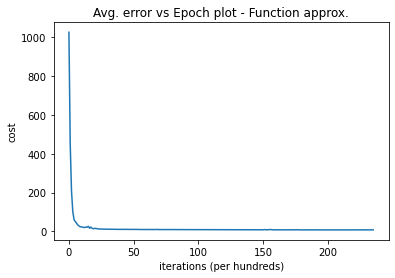

In [9]:
# Avg. error vs Epoch plot

print(i) 
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Avg. error vs Epoch plot - Function approx.")
plt.show()

In [10]:
# Checking Train on the Model

m=X_train.T.shape[1]

Z1 = np.dot(W1, X_train.T) + b1
# print(np.shape(Z1))
A1 = np.tanh(Z1)
D1 = np.random.rand(A1.shape[0], A1.shape[1])  
# print(np.shape(A1))
Z2 = np.dot(W2, A1) + b2
A2 = np.tanh(Z2)
D2 = np.random.rand(A2.shape[0], A2.shape[1])    
Z3 = np.dot(W3, A2) + b3
A3 = Z3
# print(np.shape(A3))
# print(A3)
cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
cost = np.sum((Y_train.T-A3)**2)/m
print(cost)

1.2024031811522926


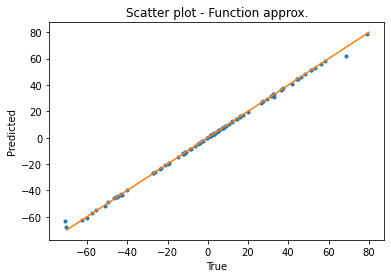

In [11]:
# Scatter plot 

pred = A3.flatten()
plt.plot(Y_train,pred,".")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Scatter plot - Function approx.")
plt.plot([-70 , 80], [-70, 80])
plt.show()

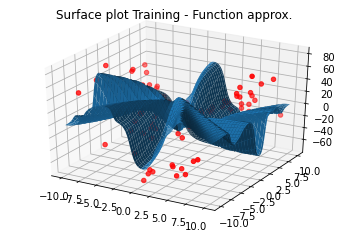

In [12]:
# Surface plot

def plotting(x, y):
    p = np.array([[x,y]]).T
    #print(np.shape(p))
    #J1 = np.dot(W1, [[x],[y]]) + b1
    J1 = []
    for u in W1:
        val = u[0]*x + u[1]*y
        J1.append(val)
    J1 = np.array(J1)
    O1 = np.tanh(J1)
    #J2 = np.dot(W2, O1) + b2
    J2 = []
    for u in W2:
        val = 0
        for y in range(len(u)):
            val = val + O1[y]*u[y]
        J2.append(val)
    J2 = np.array(J2)
    O2 = np.tanh(J2) 
    #J3 = np.dot(W3, O2) + b3
    J3 = []
    for u in W3:
        val = 0
        for y in range(len(u)):
            val = val + O2[y]*u[y]
        J3.append(val)
    return J3[0]

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z = plotting(X,Y)
ax = plt.axes(projection="3d")
ax.scatter3D(txt[:,0],txt[:,1],txt[:,2],c='r')
ax.plot_surface(X,Y,Z)
plt.title("Surface plot Training - Function approx.")
plt.show()

In [13]:
# Development Data

data=pd.read_csv('func/val.txt',delimiter=' ',header=None)

text = pd.DataFrame(data).to_numpy()

X_val = text[:, :2]
Y_val = text[:, 2]

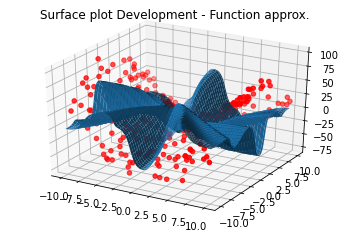

In [14]:
# Surface Plot

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z = plotting(X,Y)
ax = plt.axes(projection="3d")
ax.scatter3D(text[:,0],text[:,1],text[:,2],c='r')
ax.plot_surface(X,Y,Z)
plt.title("Surface plot Development - Function approx.")
plt.show()

In [15]:
# Working on Development data

m=X_val.T.shape[1]

Z1 = np.dot(W1, X_val.T) + b1
# print(np.shape(Z1))
A1 = np.tanh(Z1)
D1 = np.random.rand(A1.shape[0], A1.shape[1])  
# print(np.shape(A1))
Z2 = np.dot(W2, A1) + b2
A2 = np.tanh(Z2)
D2 = np.random.rand(A2.shape[0], A2.shape[1])    
Z3 = np.dot(W3, A2) + b3
A3 = Z3
# print(np.shape(A3))
# print(A3)
cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
cost = np.sum((Y_val.T-A3)**2)/m
print(cost)

112.37261339034008


In [20]:
# Test Data

data=pd.read_csv('test.txt',delimiter=' ',header=None)

text = pd.DataFrame(data).to_numpy()

X_val = text[:, :2]
Y_val = text[:, 2]

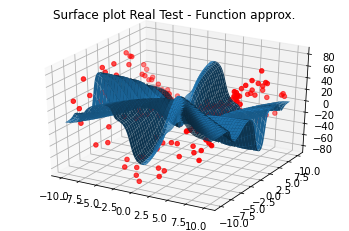

In [21]:
# Surface Plot

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z = plotting(X,Y)
ax = plt.axes(projection="3d")
ax.scatter3D(text[:,0],text[:,1],text[:,2],c='r')
ax.plot_surface(X,Y,Z)
plt.title("Surface plot Real Test - Function approx.")
plt.show()

In [22]:
# Working on Test data

m=X_val.T.shape[1]

Z1 = np.dot(W1, X_val.T) + b1
# print(np.shape(Z1))
A1 = np.tanh(Z1)
D1 = np.random.rand(A1.shape[0], A1.shape[1])  
# print(np.shape(A1))
Z2 = np.dot(W2, A1) + b2
A2 = np.tanh(Z2)
D2 = np.random.rand(A2.shape[0], A2.shape[1])    
Z3 = np.dot(W3, A2) + b3
A3 = Z3
# print(np.shape(A3))
# print(A3)
cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
cost = np.sum((Y_val.T-A3)**2)/m
print(cost)

124.05638608207266


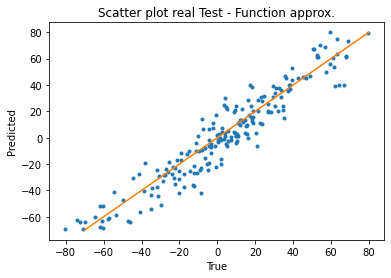

In [24]:
pred = A3.flatten()
plt.plot(Y_val,pred,".")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Scatter plot real Test - Function approx.")
plt.plot([-70 , 80], [-70, 80])
plt.show()